# Linear Classification


It will show how to code a classifier from the ground up.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import utils as ml

np.random.seed(0)
%matplotlib inline

In [16]:
lc2_data = np.genfromtxt("./data/lc2_data.txt", delimiter=None)
X, Y = lc2_data[:, :-1], lc2_data[:, -1]

print(X.shape, Y.shape)
print(X, Y)

(98, 2) (98,)
[[4.94006 3.08192]
 [4.77382 3.28124]
 [4.62014 3.13876]
 [5.07744 3.66845]
 [5.41562 3.99428]
 [4.64515 3.47066]
 [5.01138 3.44916]
 [4.48141 2.99166]
 [4.91768 3.1954 ]
 [5.4583  3.72635]
 [4.82446 3.46218]
 [4.84613 3.04824]
 [4.32656 3.00986]
 [5.86822 4.01197]
 [5.7421  4.45807]
 [5.48325 3.95333]
 [5.18109 3.58471]
 [5.71465 3.85436]
 [5.14218 3.87093]
 [5.47797 3.45834]
 [5.16126 3.7525 ]
 [4.6496  3.69595]
 [5.15357 3.30083]
 [4.81424 3.46204]
 [5.00664 3.0246 ]
 [5.03297 3.49309]
 [5.27778 3.5955 ]
 [5.26724 3.49784]
 [4.71655 3.24348]
 [4.80914 3.11857]
 [5.48578 3.48978]
 [5.26128 4.10474]
 [5.5798  4.2166 ]
 [4.92166 3.11112]
 [5.05386 3.20267]
 [5.55847 3.55104]
 [4.9465  3.17626]
 [4.42455 3.05145]
 [5.15742 3.42311]
 [5.0077  3.55858]
 [4.52249 2.32445]
 [4.47849 3.2489 ]
 [5.09443 3.5622 ]
 [5.19313 3.82423]
 [4.83497 3.0568 ]
 [5.18897 3.87605]
 [4.68117 3.22799]
 [5.36549 3.71536]
 [5.0122  3.31587]
 [7.86445 5.30894]
 [7.36484 4.73869]
 [8.64741 5.08863

## Perceptron Algorithm

As a simple example we will use the [Perceptron Algorithm](https://en.wikipedia.org/wiki/Perceptron). We will build each part seperately, showing how it works and end by wrapping it all up in a classifier class that can be used with the mltools library.

We will use a 2 classes Perceptron with classes $\{-1, 1\}$. You can also see how to use a binary classes $\{0, 1\}$ and in the wiki [page](https://en.wikipedia.org/wiki/Perceptron) you can see a generalization to multiple classes.

For an illustration of the algorithm you can watch this YouTube [clip](https://www.youtube.com/watch?v=vGwemZhPlsA)


### Decision Boundry and Classification

The Perceptron uses a decision boundary $\theta$ to compute a value for each point. Taking the sign of this value will then give us a class prediction.

We'll start by computing the decision value for each point $x^j$: $$\theta x^j$$

As an example, let's choose $j=90$ (the 90th observation in our dataset) and let's define: $$\theta = \left[-6, 0.5, 1\right]$$


In [17]:
theta = np.array([-6.0, 0.5, 1.0])

Notice the '.'s. This will make sure it's a float and not integer.


In [18]:
def add_const(X):
    return np.hstack([np.ones([X.shape[0], 1]), X])


Xconst = add_const(X)
print(X.shape, Xconst.shape)
x_j, y_j = Xconst[90], Y[90]
print(x_j, y_j)

(98, 2) (98, 3)
[1.      8.41121 5.14042] 1.0


### Response Value

The first step in the preceptron is to compute the response value. It's comptued as the inner (dot) product $\theta x^j$. The simple intuative way to do that is to use a for loop.


In [19]:
x_theta = 0
print(theta, x_j)
for i in range(x_j.shape[0]):
    x_theta += x_j[i] * theta[i]

print(x_theta)

[-6.   0.5  1. ] [1.      8.41121 5.14042]
3.346025


This is a VERY inefficient way to do compute a inner product. Luckily for us, numpy has the answer in the form of np.dot().


In [20]:
print(x_j, theta)
print(np.dot(x_j, theta))

[1.      8.41121 5.14042] [-6.   0.5  1. ]
3.346025


### Classification Decision

Now let's compute the decision classification $T[\theta x^j]$. One option is to use the [np.sign](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sign.html) method. This is not a a good solution because np.sign(0) = 0.

One solution is to check for 0s explicitly.


In [21]:
def sign(vals):
    """Returns 1 if val >= 0 else -1"""
    s = np.sign(vals)
    try:  # If vals is an array
        s[s == 0] = 1
    except:  # If vals is a float
        s = 1 if s == 0 else s
    return s

### Predict function

So now with the the decision value and sign function we can write the predict function


In [22]:
def predict(x_j, theta):
    """Returns the class prediction of a single point x_j"""
    return sign(np.dot(x_j, theta))

In [23]:
print(predict(x_j, theta))

1.0


### Computing the Prediction Error

Using the predict function, we can now compute the prediction error: $$J^j = (y^j - \hat{y}^j)$$


In [24]:
def pred_err(X, Y, theta):
    """Predicts that class for X and returns the error rate."""
    Yhat = predict(X, theta)
    return np.mean(Yhat != Y)

In [25]:
print(pred_err(x_j, y_j, theta))

0.0


### Learning Update

Using the error we can now even do the update step in the learning algorithm: $$\theta = \theta + \alpha * (y^j - \hat{y}^j)x^j$$


In [26]:
a = 0.1
y_hat_j = predict(x_j, theta)
print(theta, y_hat_j, x_j)
print(theta + a * (y_j - y_hat_j) * x_j)

[-6.   0.5  1. ] 1.0 [1.      8.41121 5.14042]
[-6.   0.5  1. ]


### Train method

Using everything we coded so far, we can fully create the train method


In [27]:
def train(X, Y, a=0.01, stop_tol=1e-8, max_iter=1000):
    # Start by adding a const
    Xconst = add_const(X)

    m, n = Xconst.shape

    # Initializing theta
    theta = np.array([-6.0, 0.5, 1.0])

    # The update loops
    J_err = [np.inf]

    for i in range(1, max_iter + 1):  # Pass through the dataset max_iter times

        for j in range(m):  # Loop through each observation
            x_j, y_j = Xconst[j], Y[j]  # Get observation j
            y_hat_j = predict(x_j, theta)  # Predict using the current theta
            theta += a * (y_j - y_hat_j) * x_j  # Update theta

        # Compute the error on the dataset after each pass
        curr_err = pred_err(Xconst, Y, theta)
        J_err.append(curr_err)

        # Stop if the change in error is small
        if np.abs(J_err[-2] - J_err[-1]) < stop_tol:
            print(
                "Reached convergance after %d iterations. Prediction error is: %.3f"
                % (i, J_err[-1])
            )
            break

    return theta

In [28]:
theta_trained = train(X, Y)

Reached convergance after 3 iterations. Prediction error is: 0.071


## Creating a Perceptron Classifier

Now let's use all the code that we wrote and create a Python class Perceptron that can plug in to the mltools package.

In order to do that, the Prceptron class has to inherit the object mltools.base.classifier

In case you haven't looked at the actual code in the mltools, now will probably be the right time.


In [29]:
from utils.base import classifier

In order to crete an object, we'll have to add self to all the methods.


In [30]:
class Perceptron(classifier):
    def __init__(self, theta=None):
        self.theta = theta

    def predict(self, X):
        """Retruns class prediction for either single point or multiple points."""
        # I'm addiing this stuff here so it could work with the plotClassify2D method.
        Xconst = np.atleast_2d(X)

        # Making sure it has the const, if not adding it.
        if Xconst.shape[1] == self.theta.shape[0] - 1:
            Xconst = add_const(Xconst)

        return self.sign(np.dot(Xconst, self.theta))

    def sign(self, vals):
        """A sign version with breaking 0's as +1."""
        return np.sign(vals + 1e-200)

    def pred_err(self, X, Y):
        Yhat = self.predict(X)
        return np.mean(Yhat != Y)

    def train(self, X, Y, a=0.02, stop_tol=1e-8, max_iter=1000):
        # Start by adding a const
        Xconst = add_const(X)

        m, n = Xconst.shape

        # Making sure Theta is inititialized.
        if self.theta is None:
            self.theta = np.random.random(n)

        # The update loops
        J_err = [np.inf]
        for i in range(1, max_iter + 1):
            for j in range(m):
                x_j, y_j = Xconst[j], Y[j]
                y_hat_j = self.predict(x_j)
                self.theta += a * (y_j - y_hat_j) * x_j

            curr_err = self.pred_err(Xconst, Y)
            J_err.append(curr_err)

            if np.abs(J_err[-2] - J_err[-1]) < stop_tol:
                print(
                    "Reached convergance after %d iterations. Prediction error is: %.3f"
                    % (i, J_err[-1])
                )
                break

### Creating a model, training and plotting predictions


First let's create the model with some initialized theta and plot the decision bounderies. For the plotting we can use the mltools plotClassify2D.


/Users/harryxiong24/Code/Study/machine-learning-collection/linear-classification/utils/plot.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )


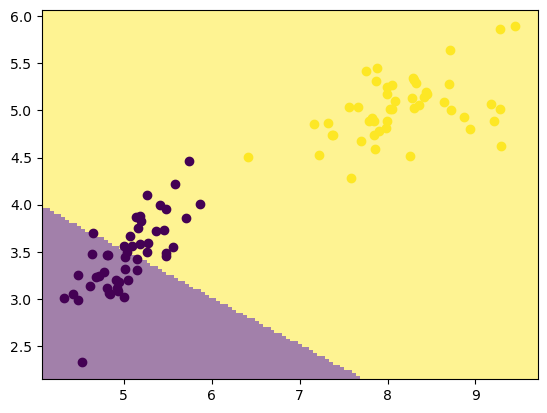

In [31]:
model = Perceptron()
model.theta = np.array([-6.0, 0.5, 1])

ml.plotClassify2D(model, X, Y)
plt.show()

Next, let's actually train the model and plot the new decision boundery.


Reached convergance after 36 iterations. Prediction error is: 0.000


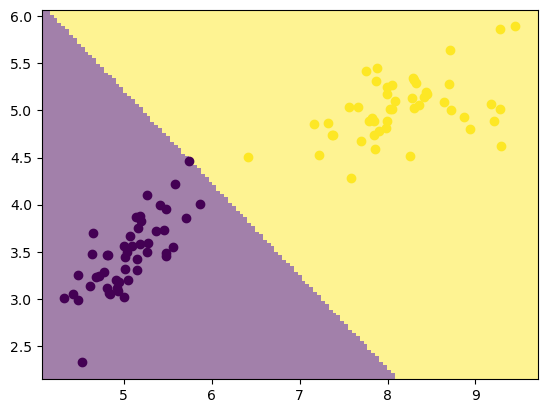

In [32]:
model.theta = np.array([-6.0, 0.5, 1])
model.train(X, Y)
ml.plotClassify2D(model, X, Y)

We found the best classifier!!!
